In [1]:
using Gadfly

In [2]:
M = 3

3

In [3]:
a = [0.5,-0.02,-0.4]

3-element Array{Float64,1}:
  0.5 
 -0.02
 -0.4 

In [4]:
N = 1000

1000

In [5]:
using Distributions

In [6]:
d = Normal(0,1)

Distributions.Normal{Int64}(μ=0, σ=1)

In [7]:
srand(1)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1749029653,1072851681,1610647787,1072862326,1841712345,1073426746,-198061126,1073322060,-156153802,1073567984  …  1977574422,1073209915,278919868,1072835605,1290372147,18858467,1815133874,-1716870370,382,0]),[2.122e-314,NaN,2.122e-314,3.59309e-316,3.59309e-316,3.59309e-316,5.43472e-322,3.59309e-316,2.122e-314,3.58122e-316  …  NaN,0.0,0.0,9.88625e-321,6.91433e-310,6.91433e-310,0.0,0.0,0.0,0.0],382,UInt32[0x00000001])

In [8]:
x = zeros(N)

1000-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [9]:
for i in 1:M
    x[i] = rand(d,1)[1]
end

In [10]:
x

1000-element Array{Float64,1}:
  0.297288
  0.382396
 -0.597634
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  ⋮       
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     

In [11]:
for i in M+1:N
    for j in 1:M
        x[i] += a[j]*x[i-j]
    end
    x[i] += rand(d,1)[1]
end

In [12]:
x

1000-element Array{Float64,1}:
  0.297288 
  0.382396 
 -0.597634 
 -0.435826 
 -1.19795  
 -0.040091 
  2.47333  
 -0.550441 
  0.221315 
 -0.436245 
  0.581336 
  1.17414  
  1.20873  
  ⋮        
  2.55619  
  0.993463 
  0.634156 
 -2.18787  
 -1.07126  
 -1.25551  
  0.760995 
 -0.982858 
 -0.143363 
 -0.112252 
  0.0540121
 -0.499323 

In [13]:
t = 1:N

1:1000

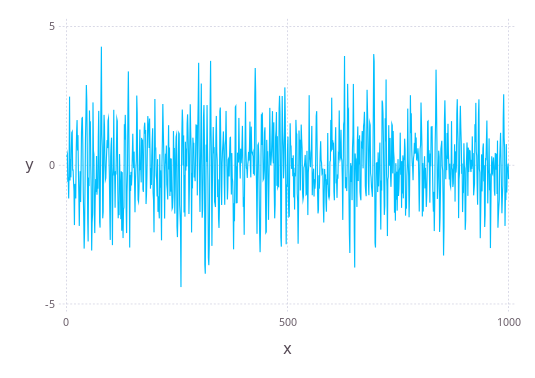

In [14]:
plot(x=t,y=x,Geom.line)

In [15]:
function c(k)
    ans = 0
    for i in 1:N-k
        ans += x[i] * x[i+k]
    end
    return ans / N
end

c (generic function with 1 method)

In [16]:
C_m = zeros(M,M)

3x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [17]:
for i in 1:M
    for j in 1:M
        C_m[i,j] = c(abs(j-i))
    end
end

In [18]:
C_m

3x3 Array{Float64,2}:
 1.68223    0.800952  0.0377038
 0.800952   1.68223   0.800952 
 0.0377038  0.800952  1.68223  

In [19]:
c_m = zeros(M)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [20]:
for i in 1:M
    c_m[i] = c(i)
end

In [21]:
c_m

3-element Array{Float64,1}:
  0.800952 
  0.0377038
 -0.692614 

In [22]:
a_m = inv(C_m)*(c_m)

3-element Array{Float64,1}:
  0.491937 
 -0.0136158
 -0.416266 

In [23]:
sigma = c(0) - (c_m)' * a_m

1-element Array{Float64,1}:
 1.00041